# Quick start guide

## Install Lakeview



Install Lakeview using [Miniconda](https://docs.conda.io/en/latest/miniconda.html) or [Anaconda](https://www.anaconda.com/):


```sh
conda install lakeview
```

Or install using `pip`:

```sh
pip install lakeview
```


## Import Lakeview

In [1]:
import lakeview as lv

## Load data from BAM file

Here we are going to visualize Illumina paired-end sequencing data from the SKBR3 breast cancer cell line. 

Publication: https://doi.org/10.1101/gr.231100.117

Can be downloaded from IGV Web

In [2]:
BAM_PATH = "../../tests/data/SKBR3_Illumina_550bp_pcrFREE.bam"
painter = lv.SequenceAlignment.from_file(BAM_PATH, region="17:64,040,802-64,045,633")

## Create an empty `GenomeViewer`

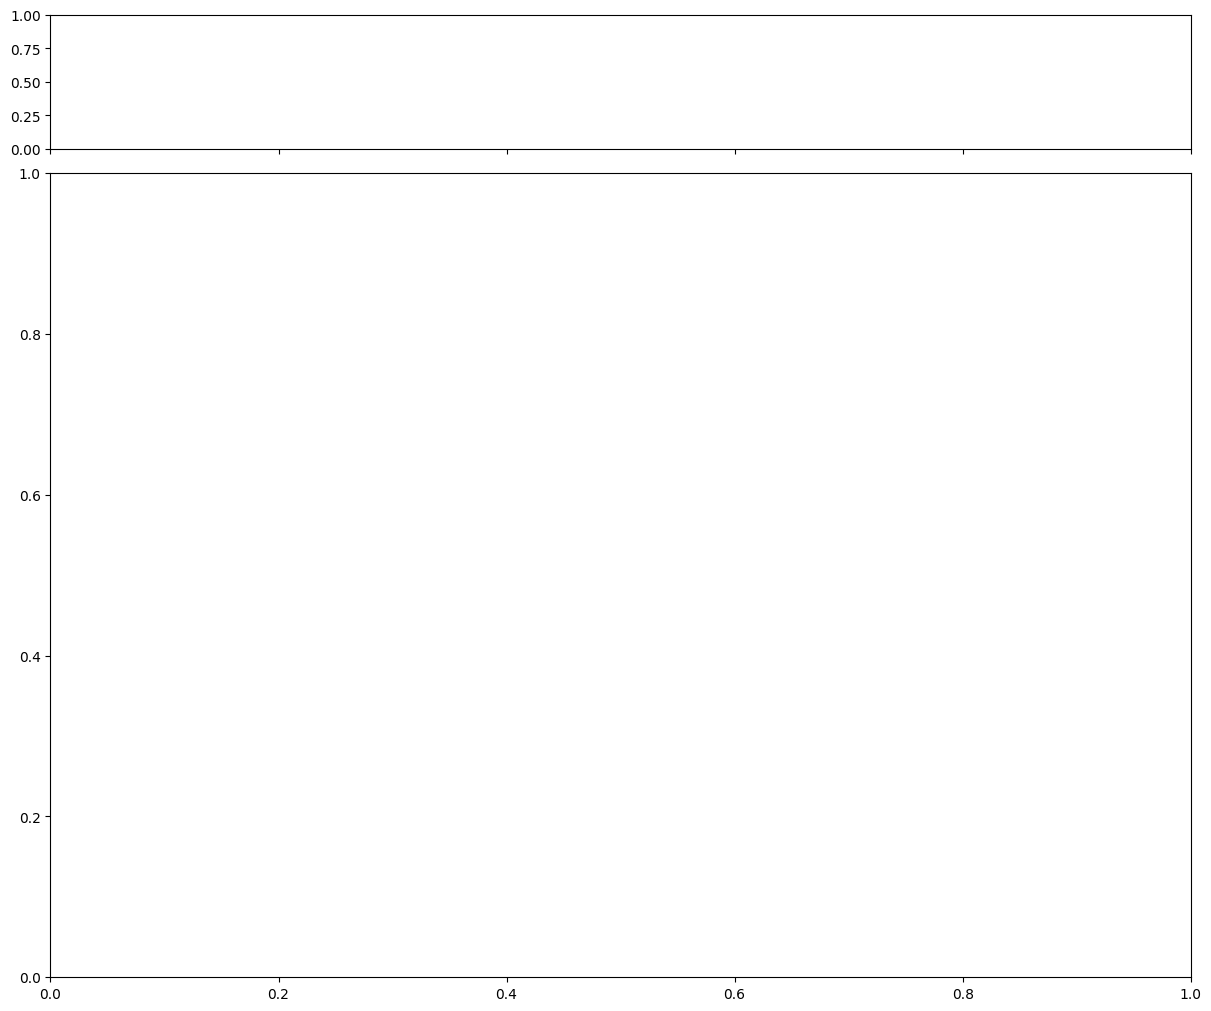

In [3]:
gv = lv.GenomeViewer(tracks=2, height_ratios=(1, 6), figsize=(12, 10))

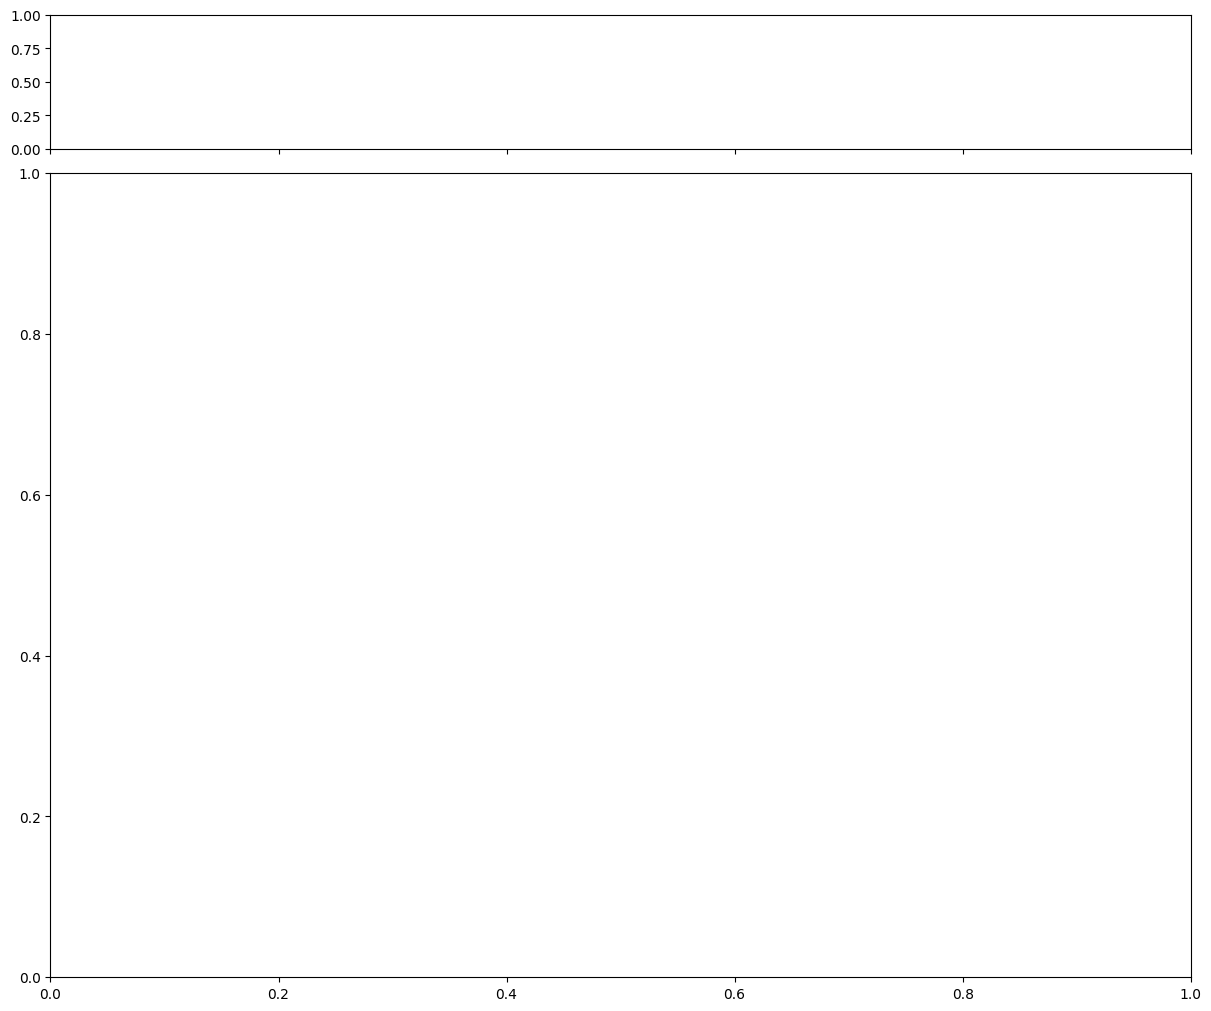

In [4]:
gv.figure

## Plot alignment data

In [5]:
painter.draw_pileup(gv.axes[0])
painter.draw_alignment(gv.axes[1])
gv.set_xlim(64040802, 64045633)
gv.use_base_pair_formatter()

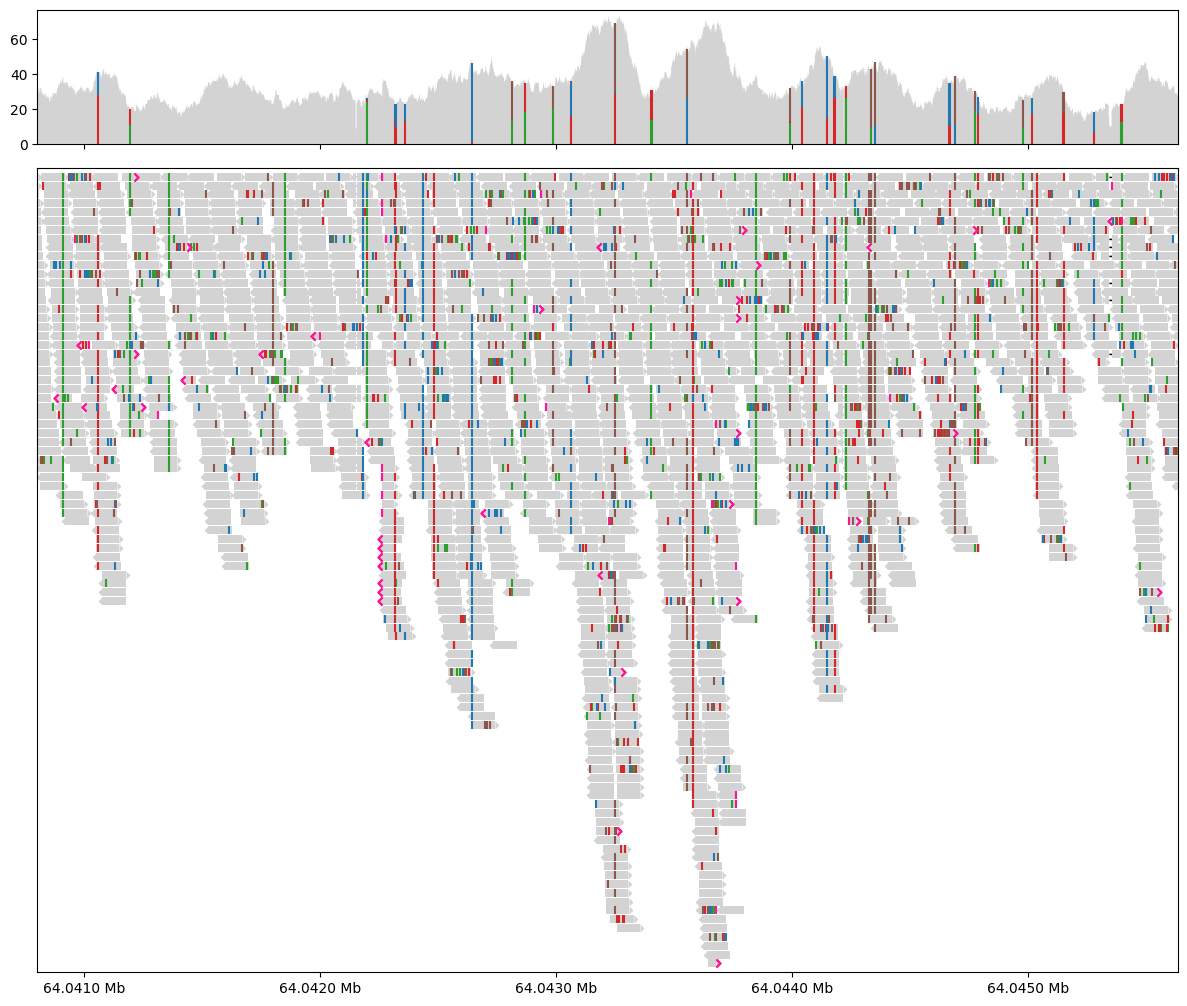

In [6]:
gv.figure

## Save the output figure

In [7]:
gv.savefig("SKBR3.png", dpi=300)